### ADP 실기 1회 (R)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_profiling import ProfileReport

import warnings 
warnings.filterwarnings('ignore')        

import os


#!git clone https://github.com/ADPclass/ADP_book_ver01.git
for dirname, _, filenames in os.walk('ADP_book_ver01/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Duplicate key in file PosixPath('/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 758 ('font.family : NanumGothicCoding')


ADP_book_ver01/data/titanic.csv
ADP_book_ver01/data/arima_data.csv
ADP_book_ver01/data/cats.csv
ADP_book_ver01/data/indian_liver_patient.csv
ADP_book_ver01/data/bodyPerformance.csv
ADP_book_ver01/data/breast-cancer.csv
ADP_book_ver01/data/iris.csv
ADP_book_ver01/data/lot_quality.csv
ADP_book_ver01/data/student-por.csv
ADP_book_ver01/data/groceries.csv
ADP_book_ver01/data/pre_student.csv
ADP_book_ver01/data/kc_house_data.csv
ADP_book_ver01/data/insurance.csv
ADP_book_ver01/data/spam.csv
ADP_book_ver01/data/avocado.csv
ADP_book_ver01/data/classification.csv
ADP_book_ver01/data/hotel_bookings.csv
ADP_book_ver01/data/diabetes_for_test.csv
ADP_book_ver01/data/Cars93.csv
ADP_book_ver01/data/mtcars.csv
ADP_book_ver01/data/USArrests.csv
ADP_book_ver01/data/cereal.csv
ADP_book_ver01/data/student-mat.csv
ADP_book_ver01/data/diabetes.csv
ADP_book_ver01/data/metalicity
ADP_book_ver01/data/credit_final.csv
ADP_book_ver01/data/CarPrice_Assignment.csv
ADP_book_ver01/data/Skyserver.csv
ADP_book_ver01/

In [2]:
import warnings 
warnings.filterwarnings('ignore')        

### 1. 연관분석

- mlxtend에 맞추어 데이터 넣기  
- apriori와 assciation_rules 순서대로 입력 

In [3]:
lotto = pd.read_csv('datafiles/lotto.csv')
lotto.tail()

,time_id,num1,num2,num3,num4,num5,num6
854,5,16,24,29,40,41,42
855,4,14,27,30,31,40,42
856,3,11,16,19,21,27,31
857,2,9,13,21,25,32,42
858,1,10,23,29,33,37,40


In [11]:
#lotto.isnull().sum()  # 결측없음 

In [4]:
lotto_arr = lotto.drop('time_id', axis=1).values
lotto_lst = []
for i in range(len(lotto_arr)):
    temp = list(filter(None, lotto_arr[i]))
    lotto_lst.append(temp)
    
lotto_lst[:5]

[[8, 22, 35, 38, 39, 41],
 [9, 13, 32, 38, 39, 43],
 [6, 10, 16, 28, 34, 38],
 [10, 24, 40, 41, 43, 44],
 [8, 15, 17, 19, 43, 44]]

In [27]:
# transaction data로 변환 후 상위 10개 로또를 막대그래프로 출력
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
lotto_tr = te.fit_transform(lotto_lst)
lotto_tr = pd.DataFrame(lotto_tr, columns=te.columns_)
lotto_tr

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [39]:
TransactionEncoder?

In [40]:
apriori?

In [75]:
#가장 빈번하게 나오는 번호
from mlxtend.frequent_patterns import apriori

res = apriori(lotto_tr, min_support=0.13, use_colnames=True)\
      .sort_values(by='support', ascending=False)\
      .iloc[:10]\
      .reset_index(drop=True)
# 'itemsets'은 frozenset 형식 (set형식. list(x)로 변환) 
res['numbers'] = res['itemsets'].apply(lambda x: int(list(x)[0]))
res.head()

,support,itemsets,numbers
0,0.155995,(34),34
1,0.146682,(40),40
2,0.146682,(27),27
3,0.145518,(43),43
4,0.144354,(20),20


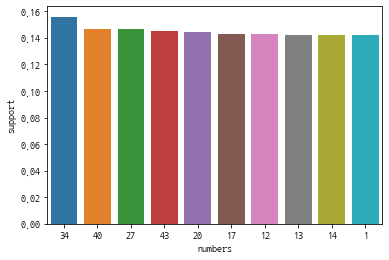

In [74]:
sns.barplot(y='support', x='numbers', data=res, 
            order=res.sort_values(by='support', ascending=False)['numbers']);

In [90]:
# 최소지지도 0.002, 최소신뢰도 0.8, 최소조합항목수 2~6개 (우측항이 한개 세트인 경우만 고르기)
from mlxtend.frequent_patterns import association_rules

res = apriori(lotto_tr, min_support=0.002, use_colnames=True)
res = association_rules(res, metric="confidence", min_threshold=0.8)

res['antecedents_len'] = res['antecedents'].apply(lambda x: len(x))
res['consequents_len'] = res['consequents'].apply(lambda x: len(x))
res['len'] = res['antecedents_len'] + res['consequents_len']

In [91]:
res['len'].value_counts()

4    632
5     72
Name: len, dtype: int64

In [97]:
res[res['antecedents']==frozenset({32,38,43})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len,len
335,"(32, 43, 38)",(9),0.002328,0.103609,0.002328,1.0,9.651685,0.002087,inf,3,1,4


In [99]:
res.query(" consequents_len == 1 ").sort_values(by='lift', ascending=False).iloc[:30]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len,len
254,"(28, 7, 23)",(9),0.002328,0.103609,0.002328,1.0,9.651685,0.002087,inf,3,1,4
335,"(32, 43, 38)",(9),0.002328,0.103609,0.002328,1.0,9.651685,0.002087,inf,3,1,4
324,"(17, 14, 33)",(9),0.002328,0.103609,0.002328,1.0,9.651685,0.002087,inf,3,1,4
330,"(18, 35, 23)",(9),0.002328,0.103609,0.002328,1.0,9.651685,0.002087,inf,3,1,4
591,"(33, 36, 37)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1,4
274,"(7, 29, 23)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1,4
276,"(24, 31, 7)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1,4
280,"(34, 7, 31)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1,4
356,"(10, 36, 34)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1,4
353,"(10, 27, 42)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1,4


In [100]:
res.query(" consequents_len == 1 ")[['support', 'confidence', 'lift']].describe()

,support,confidence,lift
count,679.000000,679.0,679.000000
mean,0.002364,1.0,7.433846
std,0.000202,0.0,0.566550
min,0.002328,1.0,6.410448
25%,0.002328,1.0,7.040984
50%,0.002328,1.0,7.279661
75%,0.002328,1.0,7.669643
max,0.003492,1.0,9.651685


해석  
- 해당 조건에 부합하는 조합은 총 679건  
- 지지도 평균은 0.002364
- 리프트는 최소 6.31 

In [102]:
# 34가 우측항에 존재하는 규칙만 추출
res.loc[res['consequents'] == frozenset({34})].reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len,len
0,"(1, 5, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1,4
1,"(2, 4, 31)",(34),0.003492,0.155995,0.003492,1.0,6.410448,0.002948,inf,3,1,4
2,"(2, 21, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1,4
3,"(2, 28, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1,4
4,"(5, 29, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1,4
5,"(17, 5, 29)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1,4
6,"(7, 22, 31)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1,4
7,"(24, 31, 7)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1,4
8,"(12, 37, 36)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1,4
9,"(25, 44, 14)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1,4


### 2.통계분석

In [107]:
fifa = pd.read_csv('datafiles/FIFA.csv', encoding='euc-kr')
fifa.tail()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1
16641,246269,G. Nugent,16,England,46,Tranmere Rovers,Right,Medium/ Medium,CM,33,2019,5'10,176,165,60,1


In [106]:
#fifa.isnull().sum()   # 결측없음

In [113]:
# Height를 cm로 변환 : 1피트=30cm, 1인치=2.5
def to_cm(x):
    f = int(x.split("'")[0])
    i = int(x.split("'")[1])
    return f*30 + i*2.5

fifa['Height_cm'] = fifa['Height'].apply(lambda x: to_cm(x))

In [166]:
# 포지션 재범주화 
mapper = {'LS':'Forward', 'ST':'Forward', 'RS':'Forward', 'LW':'Forward', 'LF':'Forward', 'CF':'Forward', 'RF':'Forward', 'RW':'Forward',
 'LAM':'Midfielder', 'CAM':'Midfielder', 'RAM':'Midfielder', 'LM':'Midfielder', 'LCM':'Midfielder', 'CM':'Midfielder', 
 'RCM':'Midfielder', 'RM':'Midfielder',
 'LWB':'Defender', 'LDM':'Defender', 'CDM':'Defender', 'RDM':'Defender', 'RWB':'Defender', 'LB':'Defender', 'LCB':'Defender', 
 'CB':'Defender', 'RCB':'Defender', 'RB':'Defender', 
 'GK':'GoalKeeper'}
fifa['Position_Class'] = fifa['Position'].map(mapper)
fifa['Position_Class'].value_counts(dropna=False)

Defender      6763
Midfielder    4935
Forward       3044
GoalKeeper    1900
Name: Position_Class, dtype: int64

In [168]:
import scipy.stats as stats

Defender = fifa.query(" Position_Class == 'Defender' ")['Value']
Midfielder = fifa.query(" Position_Class == 'Midfielder' ")['Value']
Forward = fifa.query(" Position_Class == 'Forward' ")['Value']
GoalKeeper = fifa.query(" Position_Class == 'GoalKeeper' ")['Value']

stats.f_oneway(Defender, Midfielder, Forward, GoalKeeper)

F_onewayResult(statistic=41.87390580849466, pvalue=5.988667429906719e-27)

In [171]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

mc = MultiComparison(data=fifa['Value'], groups=fifa['Position_Class'])
tukeyhsd = mc.tukeyhsd(alpha=0.5)
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Defender,Forward,930.373,0.001,756.3527,1104.3933,True
Defender,GoalKeeper,-507.3848,0.0034,-714.4045,-300.3652,True
Defender,Midfielder,760.8787,0.001,611.6108,910.1466,True
Forward,GoalKeeper,-1437.7579,0.001,-1670.8695,-1204.6462,True
Forward,Midfielder,-169.4944,0.5609,-353.2464,14.2577,False
GoalKeeper,Midfielder,1268.2635,0.001,1052.9988,1483.5282,True


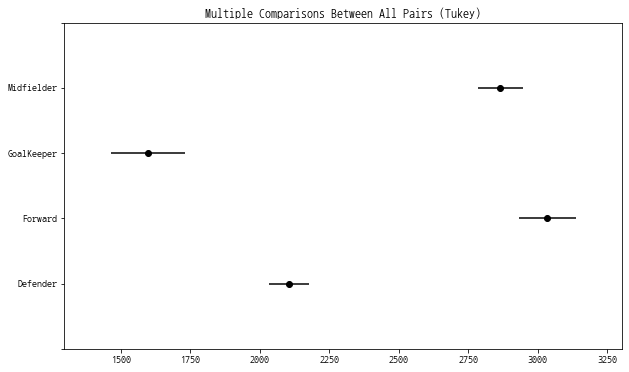

In [173]:
fig = tukeyhsd.plot_simultaneous()

<AxesSubplot:xlabel='Position_Class'>

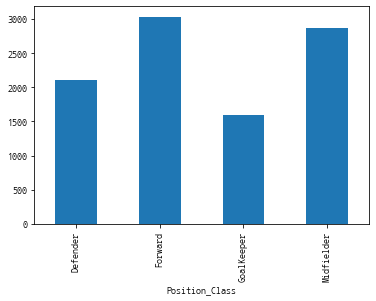

In [178]:
fifa.groupby('Position_Class')['Value'].mean().plot(kind='bar')

In [ ]:
### R교재와 미세하게 차이가 있음 

In [186]:
# 이원배치 분산분석 
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm 

formula = 'Value ~ C(Position_Class) + C(Preferred_Foot) + C(Position_Class):C(Preferred_Foot)'
model = ols(formula, fifa).fit()
aov_table = anova_lm(model, typ=2)
aov_table 

,sum_sq,df,F,PR(>F)
C(Position_Class),4.087367e+09,3.0,41.975902,5.151392e-27
C(Preferred_Foot),1.522715e+08,1.0,4.691332,3.032930e-02
C(Position_Class):C(Preferred_Foot),4.736156e+08,3.0,4.863874,2.207249e-03
Residual,5.399071e+11,16634.0,NaN,NaN


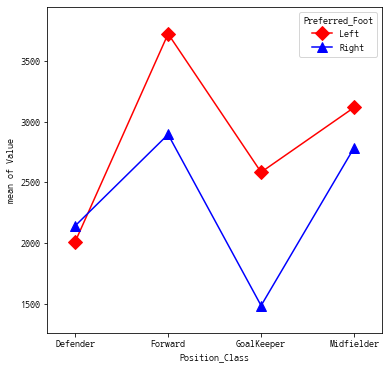

In [191]:
from statsmodels.graphics.factorplots import interaction_plot 

position = fifa['Position_Class']
foot = fifa['Preferred_Foot']
value = fifa['Value']

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(position, foot, value, 
                       colors=['red', 'blue'], markers=['D', '^'],
                       ms=10, ax=ax)

- 주효과와 교호작용 모두 유의수준 0.05에서 통계적으로 유의함 
- interaction_plot에서 defender의 경우 right가 높지만, 이외의 경우는 낮아 교호작용 효과를 시각적으로 확인 (선이 교차하는 경우 교호작용 존재함으로 해석)

In [196]:
# 회귀분석 단계적 선택법 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor 

y, X = dmatrices("Value ~ Age + Overall + Wage + Height_cm + Weight_lb", data=fifa, return_type='dataframe')

In [199]:
X.head(3)

,Intercept,Age,Overall,Wage,Height_cm,Weight_lb
0,1.0,31.0,94.0,565.0,167.5,159.0
1,1.0,33.0,94.0,405.0,185.0,183.0
2,1.0,26.0,92.0,290.0,172.5,150.0


In [200]:
y.head(3)

,Value
0,110500.0
1,77000.0
2,118500.0


In [202]:
# VIF 검증 (옵션) : 10이상이면 다중공선성 존재 -> 제거 필요
vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['VIF', 'Variable'])

,VIF,Variable
0,1.367758,Age
1,1.922019,Overall
2,1.532333,Wage
3,2.385914,Height_cm
4,2.510890,Weight_lb


In [205]:
# full model regression 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

model = smf.ols(formula="Value ~ Age + Overall + Wage + Height_cm + Weight_lb", data=fifa) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                        07:04:24   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16636   BIC:                         3.092e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9018.2165    681.645    -13.230      0.000   -1.04e+04   -7682.119
Age         -201.2516      5.030    -40.010      0.000    -211.111    -191.392
Overall      241.6286      4.013     60.213      0.000     233.763     249.494
Wage         184.1729      1.128    163.298      0.000     181.962     186.384
Height_cm     -5.0167      4.743     -1.058      0.290     -14.314       4.280
Weight_lb     -1.9622      2.064     -0.951      0.342      -6.007       2.083
==============================================================================
Omnibus:                    17088.175   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3525415.526
Skew:                           4.665   Prob(JB):                         0.00
Kurtosis:                      73.690   Cond. No.                     8.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
# 변수선택법 : 소스코드는 맨 하단 참조
stepwise_best_model = stepwise_model(X=X, y=y)

Processed  5 models on 1 predictors in
Selected predictors: ['Wage', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb84b4c4430>
forward
Processed  1 models on 0 predictors in 0.002396106719970703
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb84a771b20>
Processed  4 models on 2 predictors in
Selected predictors: ['Wage', 'Overall', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb84a6ba580>
forward
Processed  2 models on 1 predictors in 0.006609201431274414
Selected predictors: ['Wage', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb84b4c43a0>
Processed  3 models on 3 predictors in
Selected predictors: ['Wage', 'Overall', 'Age', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb84a771eb0>
forward
Processed  3 models on 2 predictors

In [219]:
stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.572e+04
Date:                Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                        07:09:59   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16637   BIC:                         3.092e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wage         184.1837      1.128    163.317      0.000     181.973     186.394
Overall      241.3450      4.002     60.310      0.000     233.501     249.189
Age         -202.1603      4.938    -40.936      0.000    -211.840    -192.480
Height_cm     -8.4446      3.082     -2.740      0.006     -14.486      -2.403
Intercept  -8690.8178    588.280    -14.773      0.000   -9843.908   -7537.727
==============================================================================
Omnibus:                    17089.038   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3525378.426
Skew:                           4.665   Prob(JB):                         0.00
Kurtosis:                      73.690   Cond. No.                     5.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
#############################
# 회귀분석 변수선택법 코드 
import pandas as pd
import numpy as np

import statsmodels.api as sm 
import statsmodels.formula.api as smf 

import time
import itertools


def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model	


def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X,columns.difference(['const']))+1):
    	Forward_result = forward(X=X,y=y,predictors=predictors)
    	if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
    	Fmodels.loc[i] = Forward_result
    	predictors = Fmodels.loc[i]["model"].model.exog_names
    	Fmodel_before = Fmodels.loc[i]["AIC"]
    	predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])
    

	
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model	


def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
    	Backward_result = backward(X=train_x, y= train_y, predictors=predictors)
    	if Backward_result['AIC'] > Bmodel_before :
        	break
    	Bmodels.loc[len(predictors) -1] = Backward_result
    	predictors = Bmodel.loc[len(predictors) - 1]['model'].model.exog_names
    	Bmodel_before = Backward_result["AIC"]
    	predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0])



# 단계적 선택법
def stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])	